In [33]:
import pandas as pd
import numpy as np
from datetime import datetime
import os
from simulation import Simulation
from glob import glob
from matplotlib import pyplot as plt
from matplotlib import ticker

In [17]:
data_files = sorted(glob('../../outputs/numpy_arrays/*'))

In [18]:
data_files

['../../outputs/numpy_arrays/simulation_status_quo_2021-11-13_11-14-23-461628.npy']

In [19]:
arr = np.load(data_files[0])

In [20]:
arr.shape

(51, 2, 2, 6)

In [21]:
np.sum(arr, axis=(1,2,3))

array([1.88430786e+08, 1.88430786e+08, 1.88430786e+08, 1.88430786e+08,
       1.88430786e+08, 1.88430786e+08, 1.88430786e+08, 1.88430786e+08,
       1.88430786e+08, 1.88430786e+08, 1.88430786e+08, 1.88430786e+08,
       1.88430786e+08, 1.88430786e+08, 1.88430786e+08, 1.88430786e+08,
       1.88430786e+08, 1.88430786e+08, 1.88430786e+08, 1.88430786e+08,
       1.88430786e+08, 1.88430786e+08, 1.88430786e+08, 1.88430786e+08,
       1.88430786e+08, 1.88430786e+08, 1.88430786e+08, 1.88430786e+08,
       1.88430786e+08, 1.88430786e+08, 1.88430786e+08, 1.88430786e+08,
       1.88430786e+08, 1.88430786e+08, 1.88430786e+08, 1.88430786e+08,
       1.88430786e+08, 1.88430786e+08, 1.88430786e+08, 1.88430786e+08,
       1.88430786e+08, 1.88430786e+08, 1.88430786e+08, 1.88430786e+08,
       1.88430786e+08, 1.88430786e+08, 1.88430786e+08, 1.88430786e+08,
       1.88430786e+08, 1.88430786e+08, 1.88430786e+08])

In [22]:
arr_year_smoking_state = np.sum(arr,axis=(1,2))
arr_year_smoking_state.shape

(51, 6)

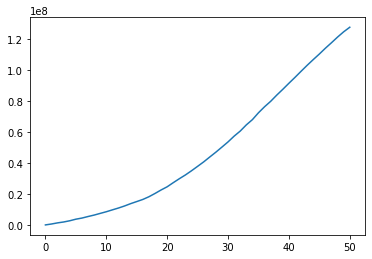

In [29]:
plt.plot(np.arange(arr_year_smoking_state.shape[0]), arr_year_smoking_state[:,5])

In [38]:
arr_year_smoking_state /= 1000000

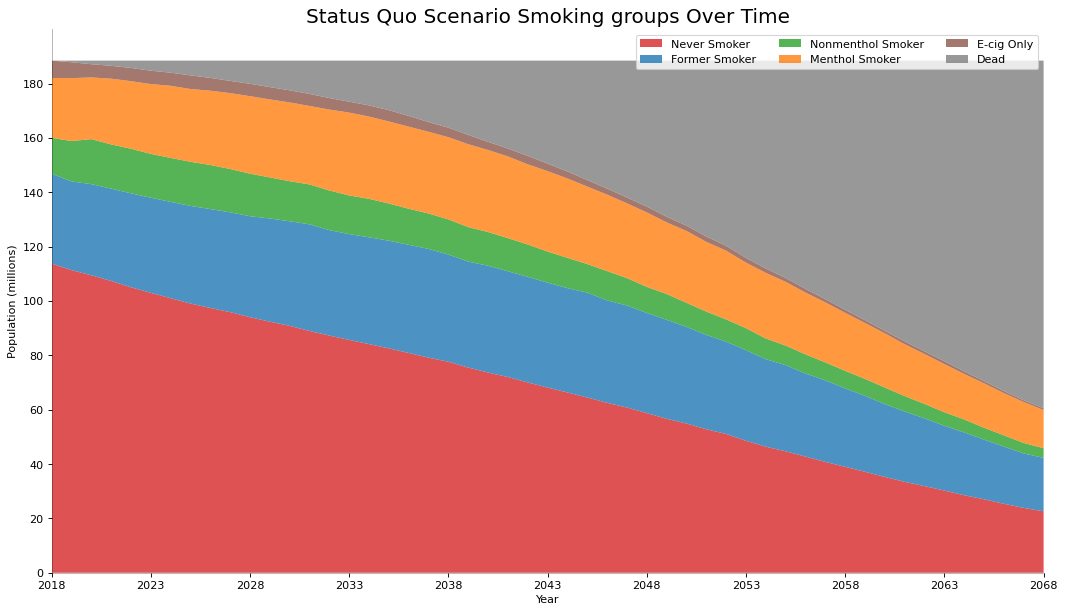

In [40]:
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey',]

fig, ax = plt.subplots(1,1,figsize=(16,9), dpi=80)
columns = ["Never Smoker", "Former Smoker", "Nonmenthol Smoker", "Menthol Smoker", "E-cig Only", "Dead"]

x = np.arange(arr_year_smoking_state.shape[0]) + 2018
y = np.vstack([arr_year_smoking_state[:,i] for i in range(arr_year_smoking_state.shape[1])])

ax = plt.gca()
ax.stackplot(x,y,labels=columns, colors=mycolors, alpha=0.8)

ax.set_title('Status Quo Scenario Smoking Groups Over Time', fontsize=18)
ax.set(ylim=[0, 2e2])
ax.legend(fontsize=10, ncol=3)
ax.ticklabel_format(useOffset=False, style='plain')
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(0,2e2,2e1,dtype=np.int64), fontsize=10)
plt.xlim(x[0], x[-1])
plt.xlabel("Year")
plt.ylabel("Population (millions)")

plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)
